In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(url)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [26]:
#Part 1.1 Create a crosstab between the product `category` and the `isBestSeller` status.

crosstab_result = pd.crosstab(df["category"], df["isBestSeller"])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [27]:
crosstab_result.columns

Index([False, True], dtype='bool', name='isBestSeller')

In [28]:
# - Are there categories where being a best-seller is more prevalent?
crosstab_result["Ratio"] = crosstab_result[True] / (crosstab_result[True]+crosstab_result[False])
crosstab_result.sort_values(by=["Ratio"],ascending=False)

isBestSeller,False,True,Ratio
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
Bedding Collections,6309,0,0.000000
CPUs,249,0,0.000000
"CD, Disc & Tape Players",8798,0,0.000000


In [36]:
crosstab_result.drop(columns = "Ratio", inplace = True)

In [37]:

# Part 1.2
# - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency

#Get the p-value (2nd element of the tuple given by chi2_contigency function)
p_value = chi2_contingency(crosstab_result)[1]

if p_value < 0.05:
    print("Bestseller distribution is not independent of the product category")
else:
    print("Bestseller distribution is independent of the product category")



#  - Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association

print("cramer's V: ",association(crosstab_result, method="cramer"))

Bestseller distribution is not independent of the product category
cramer's V:  0.1222829439760564


<Axes: xlabel='category'>

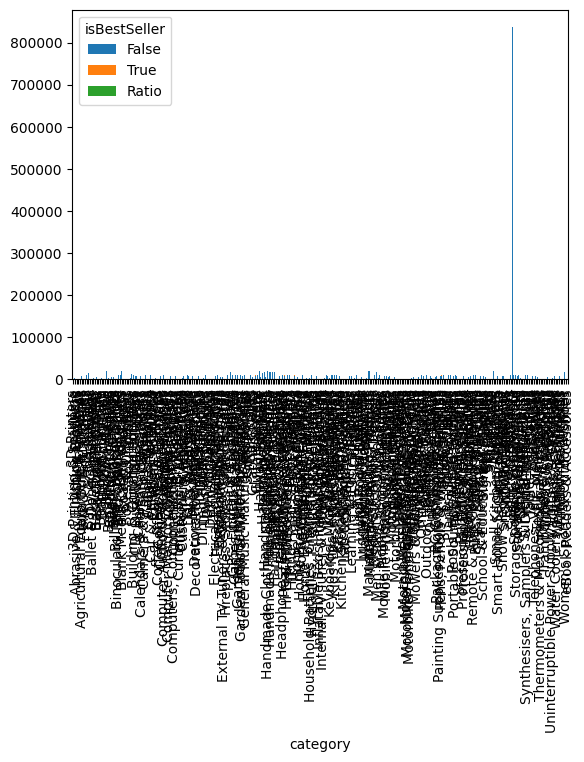

In [ ]:
# Part 1.3
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

crosstab_result.plot(kind="bar", stacked=True)

In [114]:
# Part 2.0

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
    
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
# Identify the outliers
filtered_df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]


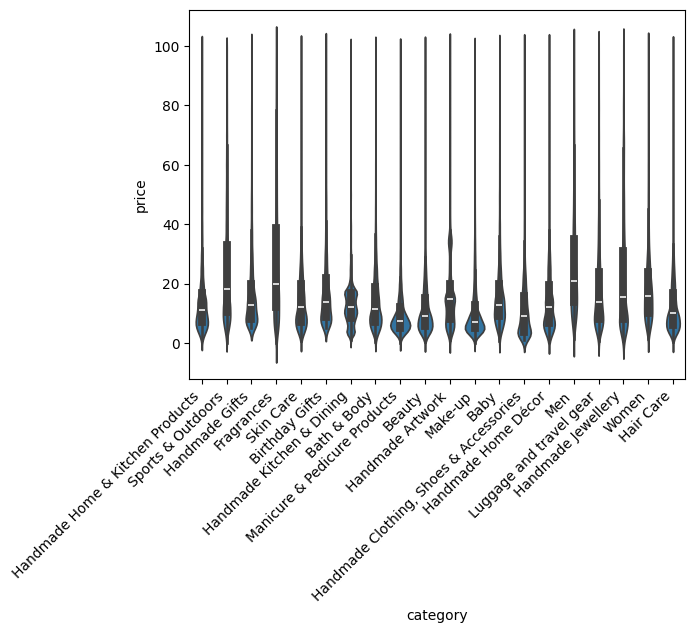

In [119]:
# Part 2.1 **Violin Plots**:

top_20 = filtered_df["category"].value_counts().nlargest(20).index

filtered_top20 = filtered_df[filtered_df["category"].isin(top_20)]

sns.violinplot(data=filtered_top20, x="category", y="price")
plt.xticks(rotation=45, ha='right')
plt.show()

In [137]:
#Which product category tends to have the highest median price
median_category_price = filtered_df.groupby("category")["price"].median()
print("highest median priced category: ",median_category_price.idxmax())

highest median priced category:  Desktop PCs


<Axes: xlabel='category'>

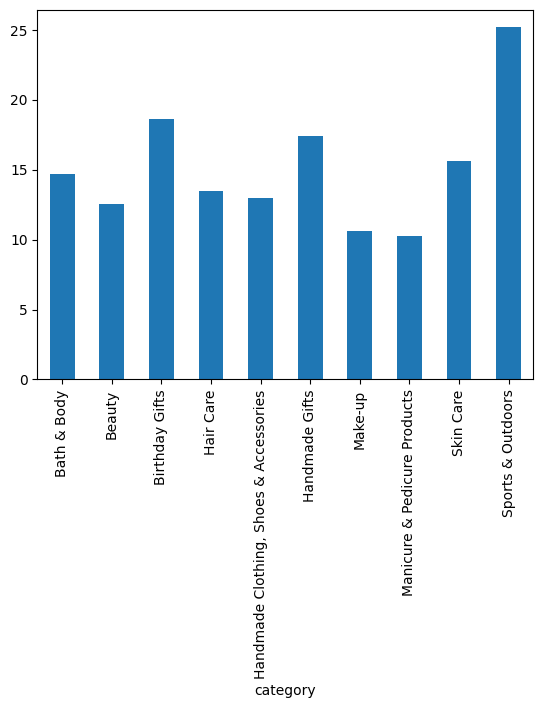

In [131]:
# Part 2.2 - Create a bar chart comparing the average price of products for the top 10 product categories (based on count)

top_10 = filtered_df["category"].value_counts().nlargest(10).index
filtered_top10 = filtered_df[filtered_df["category"].isin(top_10)]




top_10_cat_avg_prices = filtered_top10.groupby("category")["price"].mean()

top_10_cat_avg_prices.plot(kind='bar')

In [138]:
#- Which product category commands the highest average price
print("Highest average priced category:",filtered_df.groupby("category")["price"].mean().idxmax())

Highest average priced category: Motherboards


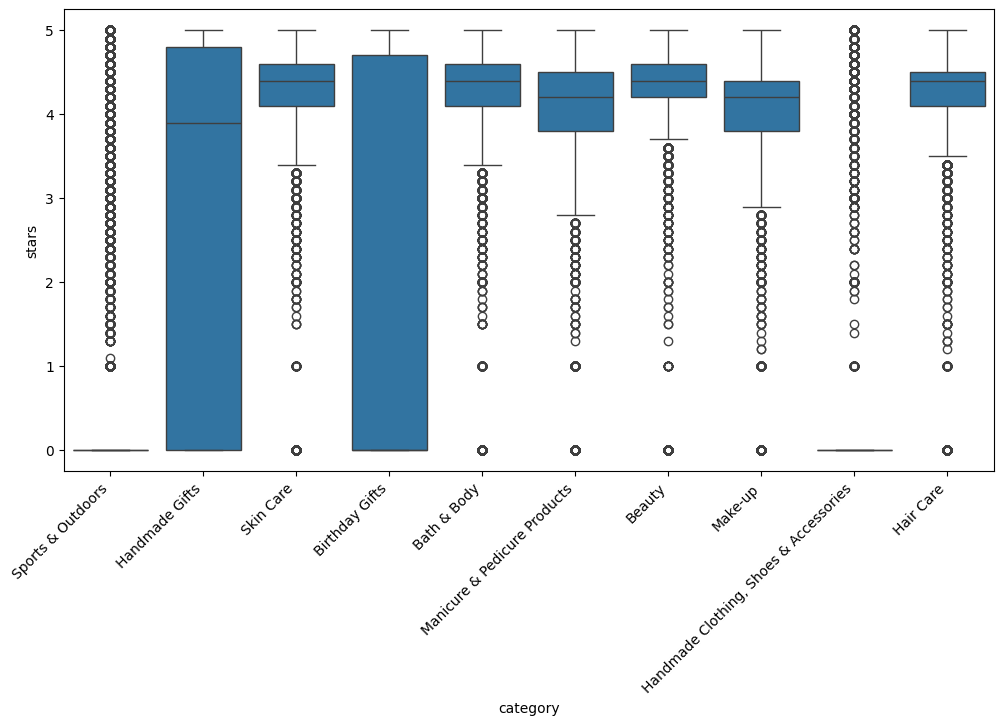

In [146]:
# Part 2.3 Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. 
# Filter out the top 10 categories based on count for better visualization.
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_top10, x="category", y="stars")
plt.xticks(rotation=45, ha='right')
plt.show()

In [147]:
# Which category tends to receive the highest median rating from customers
print("Highest median rated category:",filtered_df.groupby("category")["stars"].median().idxmax())

Highest median rated category: Computer Memory


In [157]:
# Part 3.1 Calculate the correlation coefficient between `price` and `stars`.

correlation = filtered_df["price"].corr(filtered_df["stars"])
print("Pearson CO:",correlation)
sp_correlation = filtered_df["price"].corr(filtered_df["stars"], method='spearman')
print("Spearman CO:",sp_correlation)

# Is there a significant correlation between product price and its rating?
if correlation >= 1:
    print("There is a positive correlation coefficient")
elif correlation <= 1:
    print("There is a negative correlation coefficient")
else:
    print("Little to no correlation coefficient")

Pearson CO: -0.07767299878181444
Spearman CO: -0.06679697280768455
There is a negative correlation coefficient


<Axes: xlabel='price', ylabel='stars'>

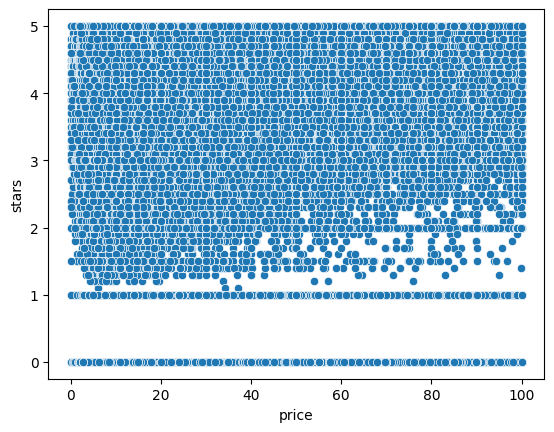

In [160]:
# Part 3.2 Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(data=filtered_df, x="price", y="stars")

<Axes: >

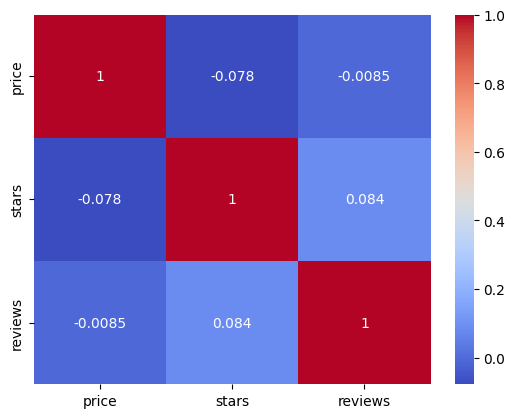

In [162]:
# - Use a correlation heatmap to visualize correlations between all numerical variables.

numerical_columns = ['price', 'stars', 'reviews']
correlation_matrix = filtered_df[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

In [163]:
import statsmodels.api as sm
sm.qqplot(filtered_df["price"], line='s');

ModuleNotFoundError: No module named 'statsmodels'